In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
file_path = r'C:\\Users\\mshus\\Google Drive\\Data Science - Springboard\\Git_GitHub\\Springboard\\Capstone Project Two\\Data\df_clean.csv'

In [3]:
data = pd.read_csv(file_path,index_col = ['Date'])

In [4]:
data.head()

,confirmed,High,Volume,adjusted_close
Date,,,,
2020-01-22,1,58.970001,169600.0,54.887253
2020-01-23,1,57.980000,227900.0,54.500458
2020-01-24,2,57.799999,146200.0,53.924980
2020-01-27,5,55.689999,230600.0,52.151379
2020-01-28,5,56.090000,174400.0,52.358929


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129 entries, 2020-01-22 to 2020-07-24
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   confirmed       129 non-null    int64  
 1   High            129 non-null    float64
 2   Volume          129 non-null    float64
 3   adjusted_close  129 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 5.0+ KB


# Check data for Stationarity

In [6]:
from statsmodels.tsa.stattools import adfuller

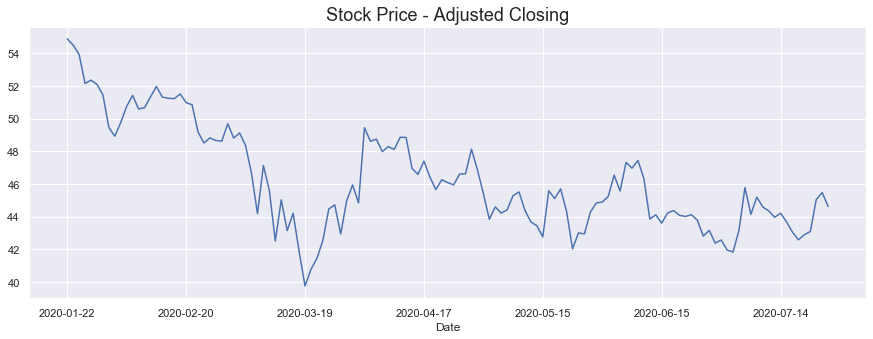

In [7]:
data.adjusted_close.plot(figsize = (15, 5))
plt.title("Stock Price - Adjusted Closing", fontsize = 18)
plt.show()

In [8]:
#Perform Augmented Dickey–Fuller test:
#Criteria : When test statistic is bigger than the 5% critical values, the data is not stationary.

# Stock Price
print('Results of Dickey Fuller Test - Stock Price:')
dftest = adfuller(data['adjusted_close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

print('The test results:')
print('....................')
if dfoutput['Test Statistic'] > dfoutput['Critical Value (5%)']:
    print('Data is not Stationary')
else:
    print('Data is stationary')

Results of Dickey Fuller Test - Stock Price:
Test Statistic                  -2.913982
p-value                          0.043746
#Lags Used                       1.000000
Number of Observations Used    127.000000
Critical Value (1%)             -3.482920
Critical Value (5%)             -2.884580
Critical Value (10%)            -2.579058
dtype: float64
The test results:
....................
Data is stationary


# Decompose the Data

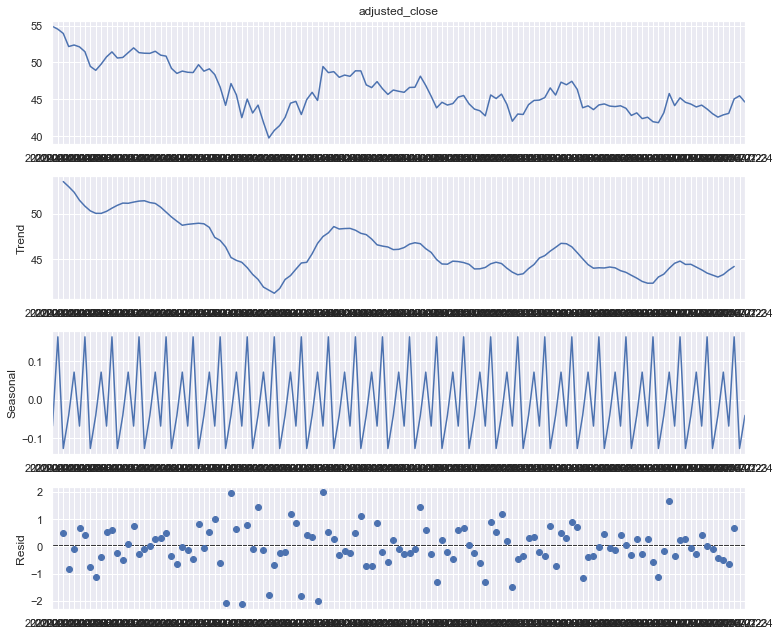

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

result = seasonal_decompose(data['adjusted_close'], model='additive', period= 5)
result.plot()
pyplot.show()

# Make data stationary

## Differencing 

yt‘ = yt – y(t-1)

In [10]:
# Transforming data by differencing

# Stock data
data['first_diff_adj_stock'] = data.adjusted_close.diff(periods = 1)
data = data.dropna()

In [11]:
data.head()

,confirmed,High,Volume,adjusted_close,first_diff_adj_stock
Date,,,,,
2020-01-23,1,57.980000,227900.0,54.500458,-0.386795
2020-01-24,2,57.799999,146200.0,53.924980,-0.575478
2020-01-27,5,55.689999,230600.0,52.151379,-1.773602
2020-01-28,5,56.090000,174400.0,52.358929,0.207550
2020-01-29,5,55.900002,214500.0,52.104210,-0.254719


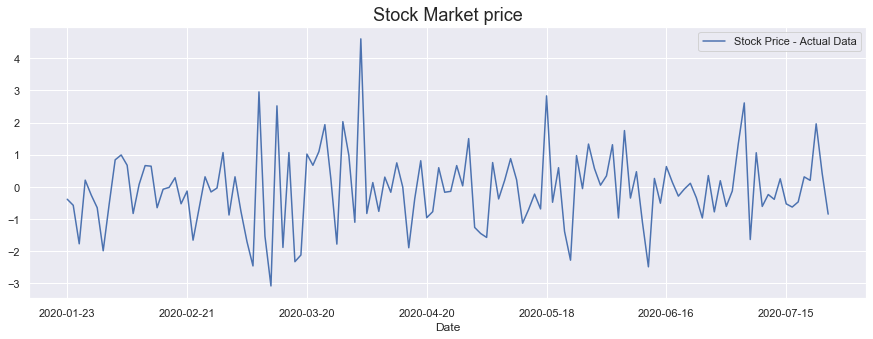

In [12]:
plt.figure(figsize = (15, 5))
data.first_diff_adj_stock.plot(label = "Stock Price - Actual Data")

#data.first_diff_adj_stock.rolling(5).mean().plot(label = "Rolling mean of stock Price")
#data.first_diff_adj_stock.rolling(5).std().plot(label = "Rolling std of stock Price")

plt.title("Stock Market price", fontsize = 18)
plt.legend()
plt.show()

In [13]:
data.isnull().sum()

confirmed               0
High                    0
Volume                  0
adjusted_close          0
first_diff_adj_stock    0
dtype: int64

In [14]:
# Adfuller test after first differences
print('Results of Dickey Fuller Test - Stock Price after transformation:')
dftest = adfuller(data.first_diff_adj_stock, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

print('The test results:')
print('....................')
if dfoutput['Test Statistic'] > dfoutput['Critical Value (1%)']:
    print('Data is not Stationary after first difference')
else:
    print('Data is stationary after first difference')

Results of Dickey Fuller Test - Stock Price after transformation:
Test Statistic                -1.301134e+01
p-value                        2.564038e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.270000e+02
Critical Value (1%)           -3.482920e+00
Critical Value (5%)           -2.884580e+00
Critical Value (10%)          -2.579058e+00
dtype: float64
The test results:
....................
Data is stationary after first difference


# Decompose data after the first difference

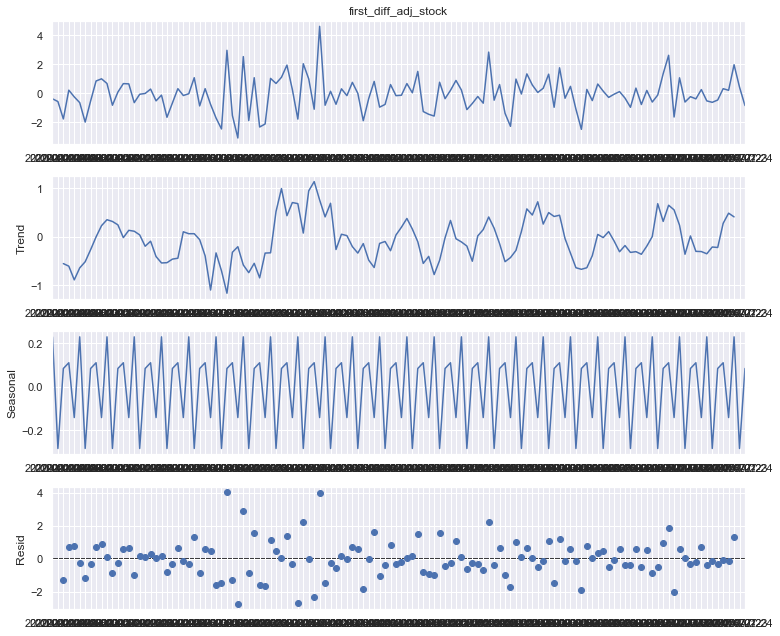

In [15]:
result = seasonal_decompose(data['first_diff_adj_stock'], model='additive', period= 5)
result.plot()
pyplot.show()

# Train and Test Data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_data, test_data = train_test_split(data, train_size=0.80, shuffle=False)

In [18]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [19]:
train_data.tail()

,confirmed,High,Volume,adjusted_close,first_diff_adj_stock
Date,,,,,
2020-06-11,2023656,45.169998,247500.0,43.849998,-2.490002
2020-06-12,2048986,44.590000,244300.0,44.110001,0.260002
2020-06-15,2114026,44.090000,154800.0,43.599998,-0.510002
2020-06-16,2137731,45.029999,113200.0,44.230000,0.630001
2020-06-17,2163290,44.630001,145000.0,44.369999,0.139999


In [20]:
test_data.head()

,confirmed,High,Volume,adjusted_close,first_diff_adj_stock
Date,,,,,
2020-06-18,2191099,44.380001,142500.0,44.080002,-0.289997
2020-06-19,2222579,44.639999,177900.0,44.009998,-0.070004
2020-06-22,2312303,44.270000,118000.0,44.119999,0.110001
2020-06-23,2347491,44.169998,207900.0,43.779999,-0.340000
2020-06-24,2382426,43.369999,195200.0,42.810001,-0.969997


In [21]:
train_data.to_csv(r'C:\\Users\\mshus\\Google Drive\\Data Science - Springboard\\Git_GitHub\\Springboard\\Capstone Project Two\\Data\train_data.csv')
test_data.to_csv(r'C:\\Users\\mshus\\Google Drive\\Data Science - Springboard\\Git_GitHub\\Springboard\\Capstone Project Two\\Data\test_data.csv')